In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from gmm import gmm
import visualize

In [2]:
# Load MNIST dataset
data_path = '../MNIST'
train_data, train_labels = load_mnist(dataset='training', path=data_path)
test_data, test_labels = load_mnist(dataset='testing', path=data_path)
# reshape
train_data = np.reshape(train_data, (train_data.shape[0], 784))
test_data = np.reshape(test_data, (test_data.shape[0], 784))
# get the set of different labels
label_set = set(train_labels)

Number of means: 10


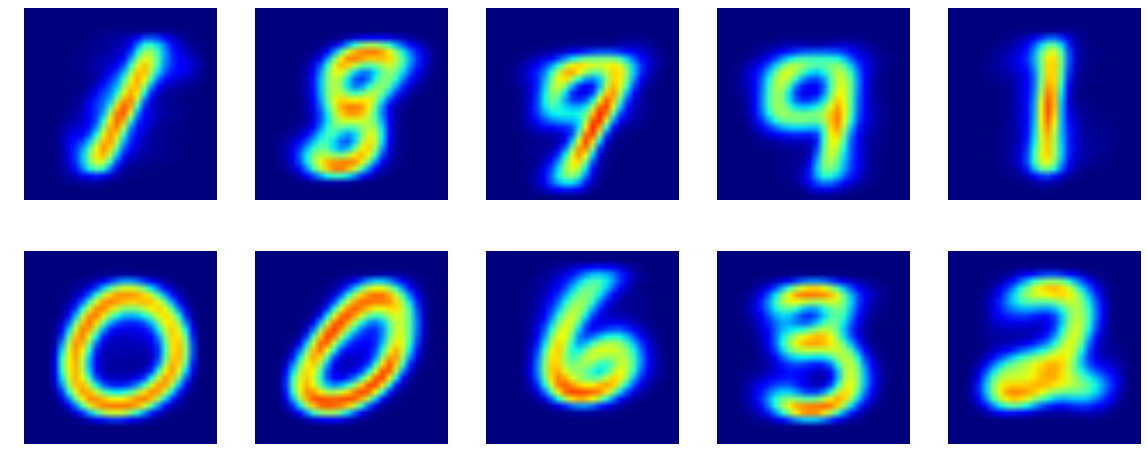

In [3]:
# load pre-computed kmeans centers
import kmeans as kmeans_

kmeans = kmeans_.load_kmeans('kmeans-10.dat')
visualize.plot_means(kmeans)

# Gaussian Mixture Model

In [4]:
from sklearn.decomposition import PCA

# Reduce 784 dims to `d `dims
d = 40

# Using PCA to reduce data dims
reducer = PCA(n_components=d)
reducer.fit(train_data)

train_data_reduced = reducer.transform(train_data)
test_data_reduced = reducer.transform(test_data)
kmeans_reduced = reducer.transform(kmeans)

using kmeans heuristic to initialize the means
initializing covars
[00] likelihood = -49.18121419376891 (elapsed 0:00:00.000017)
[01] likelihood = -47.380560723058586 (elapsed 0:00:00.129420)
[02] likelihood = -46.915108066292646 (elapsed 0:00:00.193054)
[03] likelihood = -46.70750020956149 (elapsed 0:00:00.253825)
[04] likelihood = -46.582603043727765 (elapsed 0:00:00.314548)
[05] likelihood = -46.52173705589083 (elapsed 0:00:00.374618)
[06] likelihood = -46.48939450121884 (elapsed 0:00:00.434261)
[07] likelihood = -46.46315506074182 (elapsed 0:00:00.494567)
[08] likelihood = -46.43714474987067 (elapsed 0:00:00.553895)
[09] likelihood = -46.411013283618104 (elapsed 0:00:00.614021)
[10] likelihood = -46.38561442026536 (elapsed 0:00:00.673722)
[11] likelihood = -46.36187817288982 (elapsed 0:00:00.733849)
[12] likelihood = -46.34063935907552 (elapsed 0:00:00.793103)
[13] likelihood = -46.32259943833169 (elapsed 0:00:00.852726)
[14] likelihood = -46.30785284523461 (elapsed 0:00:00.912209)

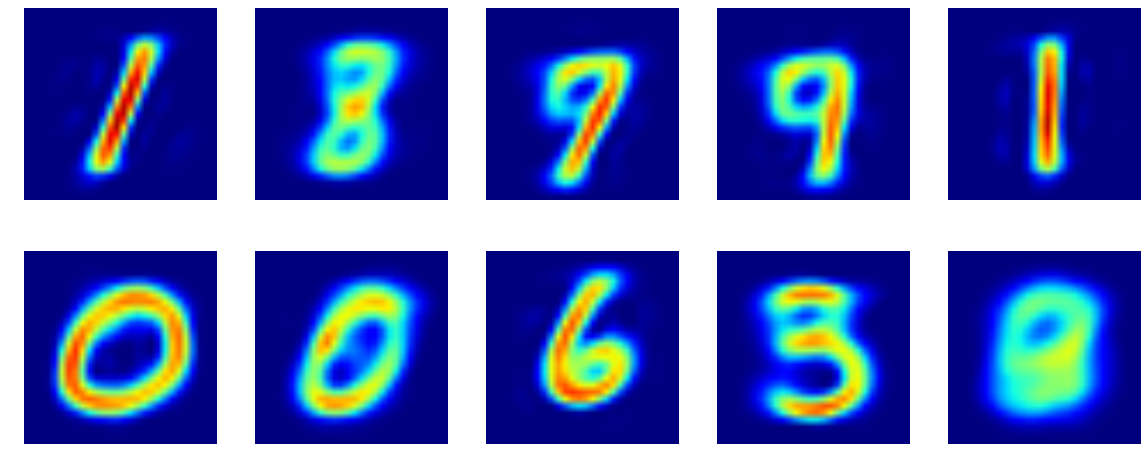

In [5]:
# number of gaussians
k = 10
model = gmm(k, verbose=True)
model.fit(train_data_reduced, means_init_heuristic='kmeans', means=kmeans_reduced)

means_projected = reducer.inverse_transform(model.means)
visualize.plot_means(means_projected)

# Classification using GMM with diagonal covariance matrux

training label 0 (5923 samples)
converged in 49 iterations in 0:00:00.274856
training label 1 (6742 samples)
converged in 53 iterations in 0:00:00.297963
training label 2 (5958 samples)
converged in 41 iterations in 0:00:00.225269
training label 3 (6131 samples)
converged in 45 iterations in 0:00:00.251751
training label 4 (5842 samples)
converged in 31 iterations in 0:00:00.167330
training label 5 (5421 samples)
converged in 35 iterations in 0:00:00.172348
training label 6 (5918 samples)
converged in 51 iterations in 0:00:00.272719
training label 7 (6265 samples)
converged in 41 iterations in 0:00:00.233241
training label 8 (5851 samples)
converged in 71 iterations in 0:00:00.376472
training label 9 (5949 samples)
converged in 43 iterations in 0:00:00.231538
Number of means: 10


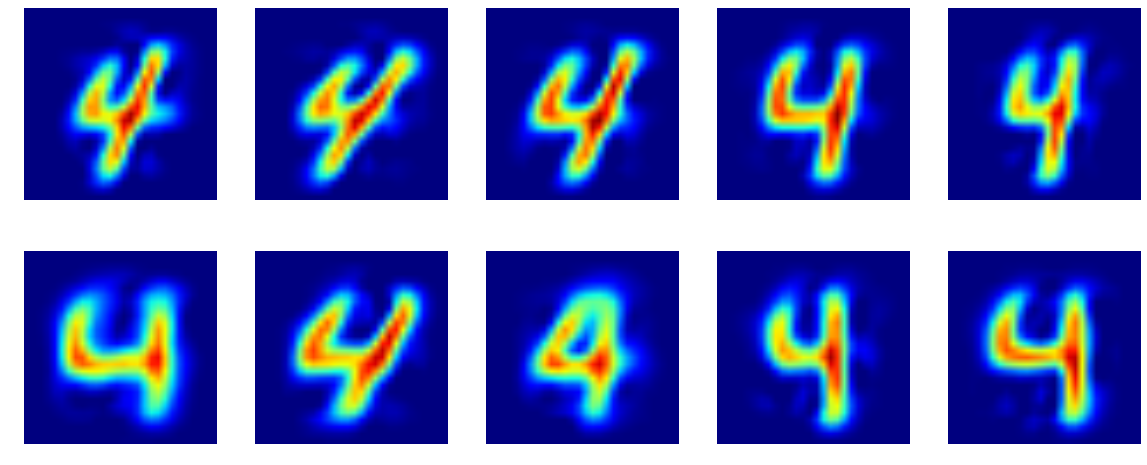

In [6]:
from classifier import classifier

bayesian_classifier = classifier(k, model_type='gmm',
                                 means_init_heuristic='kmeans',
                                 means=kmeans_reduced,
                                 covariance_type='diag')
bayesian_classifier.fit(train_data_reduced, train_labels)

means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [7]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)
print('Accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

Accuracy: 0.9318


# Classification using GMM with full covariance matrix

training label 0 (5923 samples)
converged in 8 iterations in 0:00:00.350078
training label 1 (6742 samples)
converged in 55 iterations in 0:00:02.512093
training label 2 (5958 samples)
converged in 63 iterations in 0:00:02.866808
training label 3 (6131 samples)
converged in 39 iterations in 0:00:01.821984
training label 4 (5842 samples)
converged in 43 iterations in 0:00:01.802891
training label 5 (5421 samples)
converged in 39 iterations in 0:00:01.525435
training label 6 (5918 samples)
converged in 4 iterations in 0:00:00.180319
training label 7 (6265 samples)
converged in 57 iterations in 0:00:02.620928
training label 8 (5851 samples)
converged in 50 iterations in 0:00:02.142359
training label 9 (5949 samples)
converged in 46 iterations in 0:00:01.977579
Number of means: 10


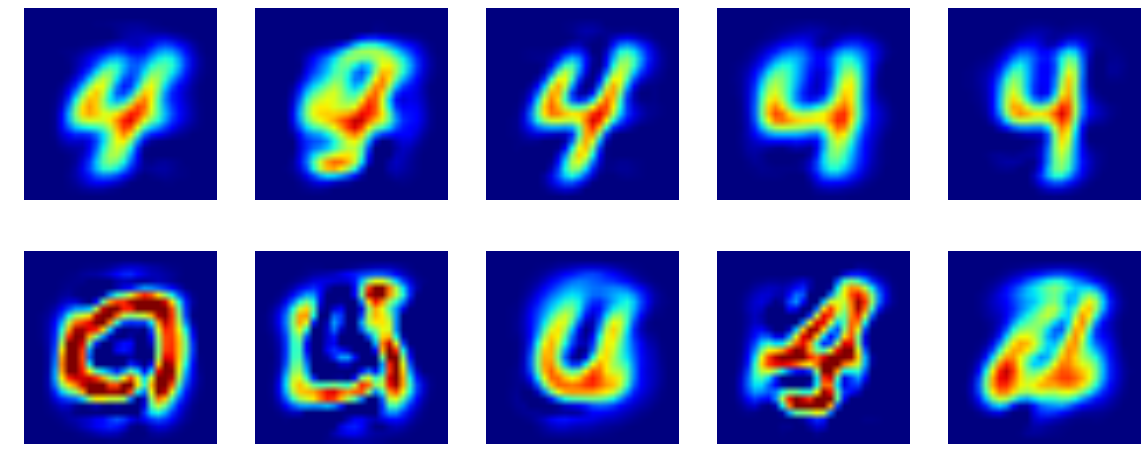

In [8]:
bayesian_classifier = classifier(k, model_type='gmm',
                                 means_init_heuristic='kmeans',
                                 means=kmeans_reduced,
                                 covariance_type='full')
bayesian_classifier.fit(train_data_reduced, train_labels)

means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [9]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)

print('Accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

Accuracy: 0.9675
